<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [108]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [15]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [17]:
data[data['sex'] == "Female"]['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [24]:
data["native-country"].value_counts(normalize = 1)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

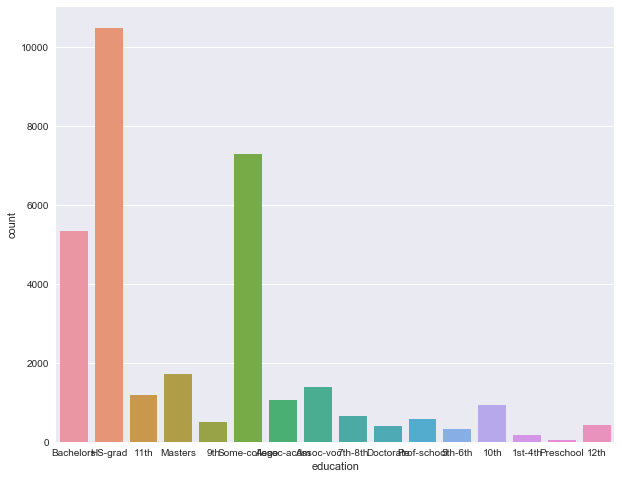

In [29]:
sns.countplot(x='education', data=data);
plt.savefig('education.png', dpi=300);

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [32]:
data.groupby(["salary"])["age"].describe()

salary       
<=50K   count    24720.000000
        mean        36.783738
        std         14.020088
        min         17.000000
        25%         25.000000
        50%         34.000000
        75%         46.000000
        max         90.000000
>50K    count     7841.000000
        mean        44.249841
        std         10.519028
        min         19.000000
        25%         36.000000
        50%         44.000000
        75%         51.000000
        max         90.000000
Name: age, dtype: float64

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [104]:
data["high_education"] = (data["education"] == "Bachelors") | (data["education"] == "Prof-school") | (data["education"] == "Assoc-acdm") | (data["education"] == "Assoc-voc") | (data["education"] == "Masters") | (data["education"] == "Doctorate")
pd.crosstab(data["high_education"], data["salary"])

salary,<=50K,>50K
high_education,,
False,18739,3306
True,5981,4535


In [106]:
data.groupby("education")["high_education"].mean()

education
10th            False
11th            False
12th            False
1st-4th         False
5th-6th         False
7th-8th         False
9th             False
Assoc-acdm       True
Assoc-voc        True
Bachelors        True
Doctorate        True
HS-grad         False
Masters          True
Preschool       False
Prof-school      True
Some-college    False
Name: high_education, dtype: bool

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [52]:
data.groupby(["race","sex"])["age"].describe()

race                sex          
Amer-Indian-Eskimo  Female  count      119.000000
                            mean        37.117647
                            std         13.114991
                            min         17.000000
                            25%         27.000000
                            50%         36.000000
                            75%         46.000000
                            max         80.000000
                    Male    count      192.000000
                            mean        37.208333
                            std         12.049563
                            min         17.000000
                            25%         28.000000
                            50%         35.000000
                            75%         45.000000
                            max         82.000000
Asian-Pac-Islander  Female  count      346.000000
                            mean        35.089595
                            std         12.300845
                

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [55]:
data["marital-status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [61]:
data["married"] = (data["marital-status"] == "Married-civ-spouse") | (data["marital-status"] == "Married-spouse-absent") | (data["marital-status"] == "Married-AF-spouse")
pd.crosstab(data["married"], data["salary"])

salary,<=50K,>50K
married,,
False,16039,1105
True,8681,6736


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [82]:
workhours_max = data["hours-per-week"].max(); workhours_max

99

In [83]:
worhours_max_num = data[data["hours-per-week"] == data["hours-per-week"].max()]["age"].count(); worhours_max_num

85

In [94]:
data[data["hours-per-week"] == data["hours-per-week"].max()]["salary"].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [109]:
data.groupby(["native-country", "salary"])["hours-per-week"].mean()

native-country              salary
?                           <=50K     40.164760
                            >50K      45.547945
Cambodia                    <=50K     41.416667
                            >50K      40.000000
Canada                      <=50K     37.914634
                            >50K      45.641026
China                       <=50K     37.381818
                            >50K      38.900000
Columbia                    <=50K     38.684211
                            >50K      50.000000
Cuba                        <=50K     37.985714
                            >50K      42.440000
Dominican-Republic          <=50K     42.338235
                            >50K      47.000000
Ecuador                     <=50K     38.041667
                            >50K      48.750000
El-Salvador                 <=50K     36.030928
                            >50K      45.000000
England                     <=50K     40.483333
                            >50K      44.533333
Franc